### Good web pages to use
<ul>
    <li><b>train_test_split:</b> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html </li>
    <li><b>RandomForestClassifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html </li>
    <li><b>Confusion matrix:</b> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Pickle version

In [2]:
df = pd.read_pickle('images.pkl')

### .csv version

In [18]:
df = pd.read_csv('images2.csv')

## Data fitting

In [3]:
df.head() # Just to check that everything looks fine

,Image,Identity,Gender,Hand,Finger
0,"[160, 156, 156, 156, 156, 156, 156, 156, 156, ...",229,0,0,2
1,"[160, 156, 156, 156, 156, 156, 156, 156, 156, ...",169,1,1,4
2,"[160, 156, 156, 156, 156, 156, 156, 156, 156, ...",356,0,0,4
3,"[160, 156, 156, 156, 156, 156, 156, 156, 156, ...",352,0,0,3
4,"[160, 156, 156, 156, 156, 156, 156, 156, 156, ...",406,0,0,1


In [4]:
# Choose which columns to be data (X) and target (y)
X = list(df["Image"]) # The data to be categorized, should be "Image"
y = df["Hand"] # The target value

In [5]:
np.shape(X) # Should be ([number of images], [number of pixels])

(6000, 8100)

In [6]:
# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
# Create the model
model = RandomForestClassifier(n_estimators=100) # See link above for default values of parameters
# Build a forest of trees from the training set (X_train, y_train).
model.fit(X_train,y_train) # Sample weight can be added, but shouldn't be necessary in our case

RandomForestClassifier()

In [8]:
# Return the mean accuracy on the given test data and labels.
# Preferrably as close to 1 as possible. Can be improved by tweaking
# n_estimators above
model.score(X_test,y_test)

0.735

## Confusion matrix
#### Some explanations
##### predict(X_test)
Predict class for X.<br>
The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability estimates. That is, the predicted class is the one with highest mean probability estimate across the trees.
##### Percentage or absolute numbers in the matrix
Percentage is ok if the distribution is uniform, otherwise not (better [source](https://stats.stackexchange.com/questions/55476/confusion-matrices-with-percentages-rather-than-number-of-instances) for this is needed).

Text(33.0, 0.5, 'Truth')

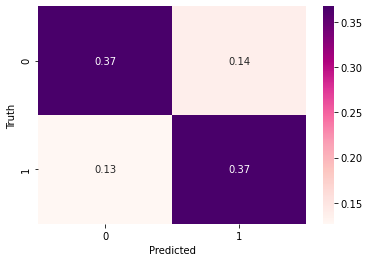

In [9]:
# Predict class for X.
y_predicted = model.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_predicted, normalize='all') # Remove 'normalize="all"' to get absolute numbers
plt.figure()
sn.heatmap(cm, annot=True, cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')